In [38]:
import pandas as pd
import plotly.express as px
import re

In [6]:
df = pd.read_csv('Airbnb_Open_Data.csv')

In [7]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [9]:
pd.options.display.max_columns

20

In [10]:
pd.options.display.max_columns = 30

In [11]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [16]:
df.head(100)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1053805,Charming 1 bed GR8 WBurg LOCATION!,85349309260,NaN,Chester,Brooklyn,Williamsburg,40.70984,-73.95775,United States,US,False,moderate,Entire home/apt,2010.0,$360,$72,5.0,168.0,7/22/2018,1.57,NaN,1.0,82.0,"No pets. Sorry, it takes too long to clean. N...",NaN
96,1054357,NaN,43086080920,verified,Joyce,Brooklyn,Bushwick,40.70093,-73.92609,United States,US,True,strict,Entire home/apt,2011.0,$380,$76,NaN,118.0,6/18/2019,1.05,NaN,2.0,92.0,NaN,NaN
97,1054909,NaN,8644470108,verified,Sydney,Manhattan,Upper West Side,40.79764,-73.96177,United States,US,True,strict,Entire home/apt,2017.0,$343,$69,NaN,NaN,7/7/2019,0.71,NaN,1.0,55.0,We ask that guests be respectful and considera...,NaN
98,1055461,NaN,2531706698,NaN,Victoria,Manhattan,Harlem,40.82803,-73.94731,United States,NaN,NaN,flexible,Private room,2021.0,$160,$32,NaN,1.0,10/9/2018,0.11,NaN,1.0,158.0,House should be left as tidy as you found it. ...,NaN


In [14]:
pd.options.display.max_rows 

60

In [17]:
pd.options.display.max_rows = 100

In [19]:
pd.set_option('display.max_rows', 60) # эквивалентно pd.options.display.max_rows = 60

In [20]:
pd.get_option('display.max_colwidth')

50

In [21]:
pd.set_option('display.max_colwidth', 100)

In [22]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like your home to be treated. No smoking.,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the pet you are planning on bringing with you is OK. ...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and laundry facilities. There is no additional charge...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on the property (you can go to the nearby corner). Rea...",NaN


In [23]:
pd.reset_option('display.max_colwidth')

In [24]:
pd.get_option('display.max_colwidth')

50

## Plotly express

In [26]:
data_px = px.data.iris()

In [27]:
data_px.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


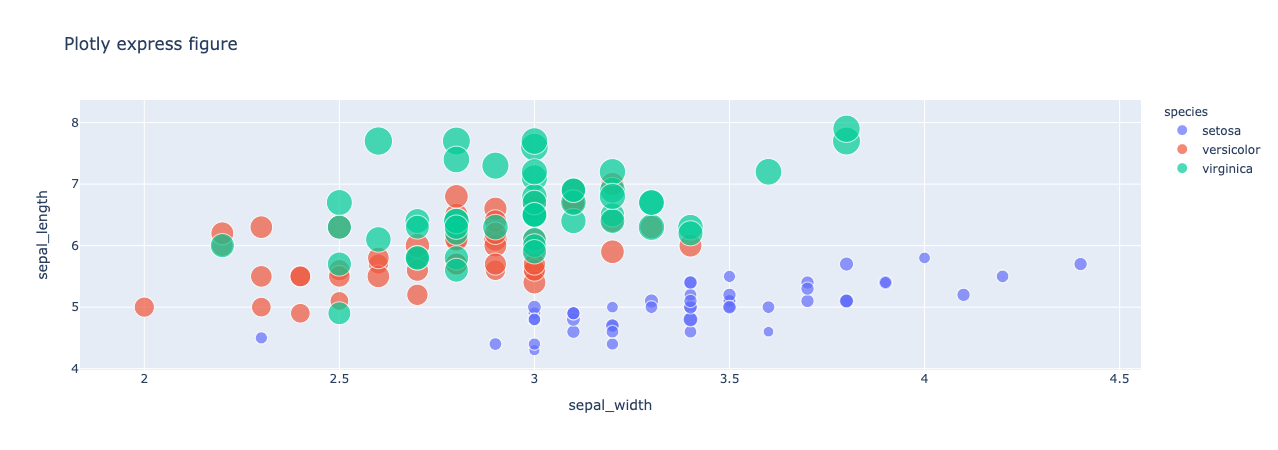

In [31]:
fig = px.scatter(data_px, x='sepal_width', y='sepal_length', title='Plotly express figure', color='species', size='petal_length')
fig.show()

In [32]:
data = px.data.gapminder()
data.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [33]:
data_canada = data[data.country == 'Canada']
data_canada.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
240,Canada,Americas,1952,68.75,14785584,11367.16112,CAN,124
241,Canada,Americas,1957,69.96,17010154,12489.95006,CAN,124
242,Canada,Americas,1962,71.30,18985849,13462.48555,CAN,124
243,Canada,Americas,1967,72.13,20819767,16076.58803,CAN,124
244,Canada,Americas,1972,72.88,22284500,18970.57086,CAN,124


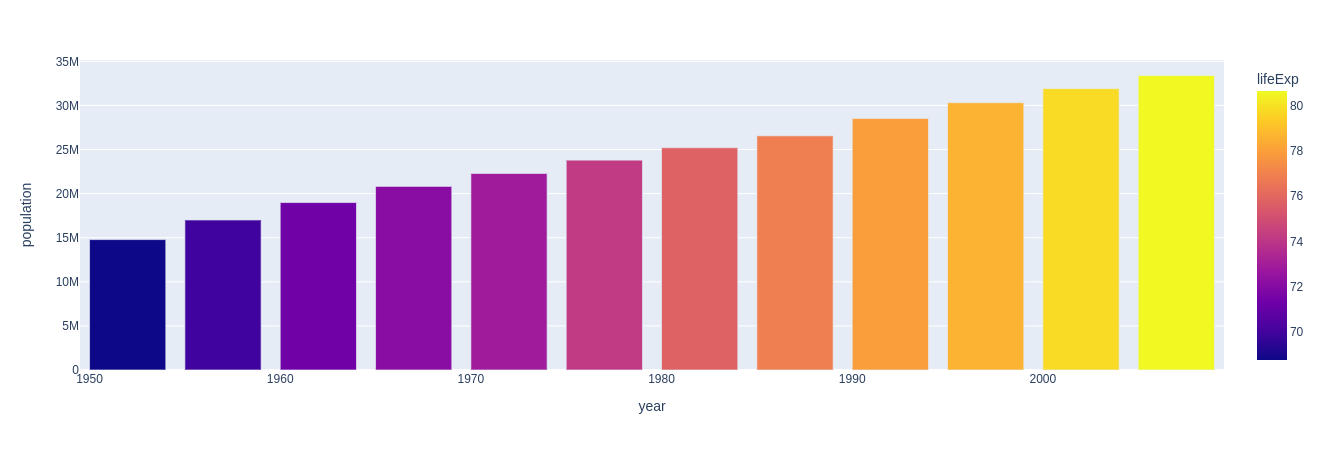

In [37]:
fig = px.bar(data_canada, x='year', y='pop', hover_data=['lifeExp', 'gdpPercap'], color='lifeExp', labels={'pop':'population'})
fig.show()

## Регулярные выражения

In [55]:
temp = 'Солнце светит, земля крутится, птички чирикают, птички поют'
temp

'Солнце светит, земля крутится, птички чирикают, птички поют'

In [50]:
re.match('Солнце', temp)#.group()

<re.Match object; span=(0, 6), match='Солнце'>

In [51]:
re.match('земля', temp)

In [54]:
re.search('земля', temp)#.group()

<re.Match object; span=(15, 20), match='земля'>

In [56]:
re.search('птички', temp)

<re.Match object; span=(31, 37), match='птички'>

In [57]:
re.findall('птички', temp)

['птички', 'птички']

In [58]:
re.sub('светит', 'не светит', temp)

'Солнце не светит, земля крутится, птички чирикают, птички поют'

In [62]:
test_string = 'call me 8956456-87-96 20 раз, перезвони сюда7 (123) 456-78-90 948475завтра не звони 8 (666) 111 33-66 проалфуар 8(964)569-69-77 "35273"+7(982)1231415 8-903-567-28-37'
test_string

'call me 8956456-87-96 20 раз, перезвони сюда7 (123) 456-78-90 948475завтра не звони 8 (666) 111 33-66 проалфуар 8(964)569-69-77 "35273"+7(982)1231415 8-903-567-28-37'

In [63]:
pattern = '[+]?[78][\s(-]*\d{3}[\s)-]*\d{3}[\s-]?\d{2}[\s-]?\d{2}'
re.findall(pattern, test_string)

['8956456-87-96',
 '7 (123) 456-78-90',
 '8 (666) 111 33-66',
 '8(964)569-69-77',
 '+7(982)1231415',
 '8-903-567-28-37']